# Distributions

Interesting sources: 
- https://www.edx.org/course/probability-the-science-of-uncertainty-and-data

In [1]:
import numpy as np
import pandas as pd

# Uniform distribution

## Rolling a 6-sided die

<img src="https://wherethewindsblow.com/wp-content/uploads/2015/07/JUMBO-Six-sided-white-dice.jpg" style="width: 300px;"/>

In [2]:
minValue = 1
maxValue = 6
numberOfSamples = 6000000 # Increase number to show that it converges to a uniform distribution

In [3]:
results = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=numberOfSamples) )

In [4]:
results

0          6
1          6
2          1
3          1
4          2
          ..
5999995    3
5999996    6
5999997    2
5999998    2
5999999    4
Length: 6000000, dtype: int32

<AxesSubplot:>

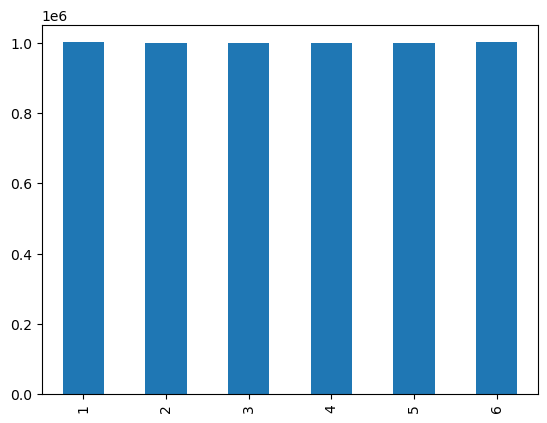

In [5]:
results.value_counts().sort_index().plot(kind='bar')

## Normal distribution

### Sampling from the average length a full-grown citizen in the Netherlands.

In [6]:
averageLength = 174.25
stdLength = 15
numberOfPeopleToSample = 300000 # Play with these values to show the impact on the histogram

In [7]:
randomLengths = pd.Series( np.random.normal(averageLength, stdLength, numberOfPeopleToSample) )

In [8]:
randomLengths

0         198.017675
1         148.386301
2         169.077341
3         160.986009
4         204.355548
             ...    
299995    178.538107
299996    171.600513
299997    180.011574
299998    175.395490
299999    147.075602
Length: 300000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

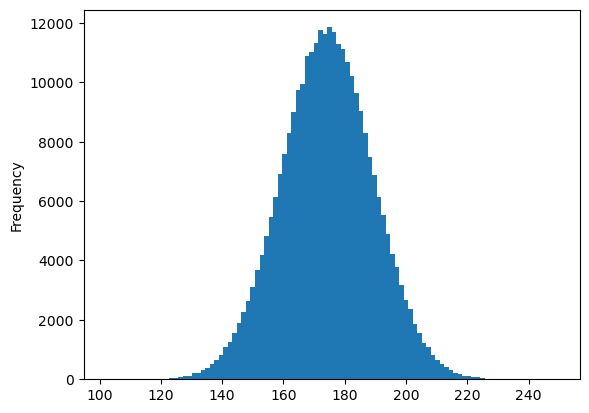

In [9]:
randomLengths.plot(kind='hist', bins=100)

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg 'Normal distribution')

### Examples of normal distribution in real life
- https://studiousguy.com/real-life-examples-normal-distribution/
- https://galtonboard.com/probabilityexamplesinlife

### Central limit theorem

In [10]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 100000 # 10000

for i in range(sampleMeansSize):
    randomLengths = pd.Series( np.random.normal(averageLength, stdLength, sampleSize) )
    sampleMeans.append(randomLengths.mean())

In [11]:
sampleMeans

[176.85580517645732,
 175.5164162629831,
 175.21986823304997,
 174.7130597943932,
 172.7331153882829,
 174.80502575718026,
 174.48443795693925,
 173.74021576596328,
 176.44993593342147,
 173.91039165985342,
 175.1734394598151,
 171.35794438337518,
 175.9867403280026,
 175.31500532525143,
 171.38769945721822,
 176.93399252193296,
 176.84522678009057,
 173.2481109109244,
 173.14498704448127,
 174.6396270798322,
 174.40378013257603,
 173.16905058111308,
 174.7484798669457,
 173.4706405250966,
 175.22141256929183,
 175.20073157376152,
 172.28175695287328,
 174.50234159753992,
 175.71706210294204,
 176.93471266506566,
 178.14742128508445,
 174.0960378580421,
 172.48138729848267,
 176.69423377551132,
 175.016896947764,
 172.15144706190574,
 174.07097545005058,
 174.24170989433776,
 173.62753778935533,
 174.88723762399317,
 174.01313401994818,
 171.34644309958534,
 175.7169768282312,
 175.46437093821027,
 174.83383119307803,
 174.1040154573441,
 175.5140925491707,
 173.43463265092566,
 174.08

<AxesSubplot:ylabel='Frequency'>

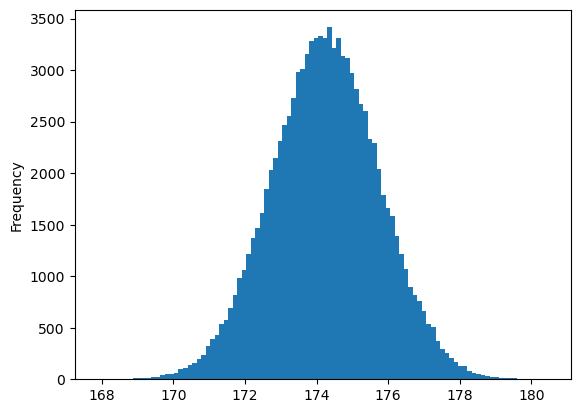

In [12]:
pd.Series(sampleMeans).plot(kind='hist', bins = 100)

In [13]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomRolls = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=sampleSize) )
    sampleMeans.append(randomRolls.mean())

<AxesSubplot:ylabel='Frequency'>

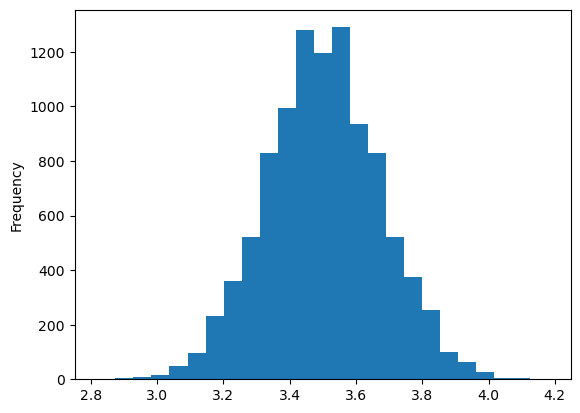

In [14]:
pd.Series(sampleMeans).plot(kind='hist', bins = 25)

### Confidence interval

![](https://getcalc.com/formula/statistics/mean-confidence-interval-infinite-population.png)

So let's reconsider one sample. Based on this one sample, what can we say about the mean of the underlying population?

In [15]:
import scipy.stats as st
confidence = 0.99
st.t.interval(confidence, len(randomLengths)-1, loc=randomLengths.mean(), scale=st.sem(randomLengths))

(170.44544007283466, 177.98967365549439)

In [16]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomRolls)-1, loc=randomRolls.mean(), scale=st.sem(randomRolls))

(2.967672832789758, 3.6923271672102422)

Let's apply this to the iris dataset. What is the 95% confidence interval of the sepal_length? Meaning, let's calculate the interval that contains the real mean sepal length with 95% confidence.

In [17]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(iris)-1, loc=iris['sepal_length'].mean(), scale=st.sem(iris['sepal_length']))

(5.709732481507367, 5.976934185159302)

### Portfolio assignment 7
15 min: Look at the histogram of at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you recognise the distribution? Does it look like a uniform or normal distribution or something else? If it doesn't look like a uniform or normal distribution, take a quick look here to see if you can find the distribution shape: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

![](https://i.imgur.com/0v1CGNV.png)

In [21]:
pokemons = pd.read_csv('Pokemon.csv', sep=',')

In [23]:
pokemons.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [25]:
pokemons.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<AxesSubplot:ylabel='Frequency'>

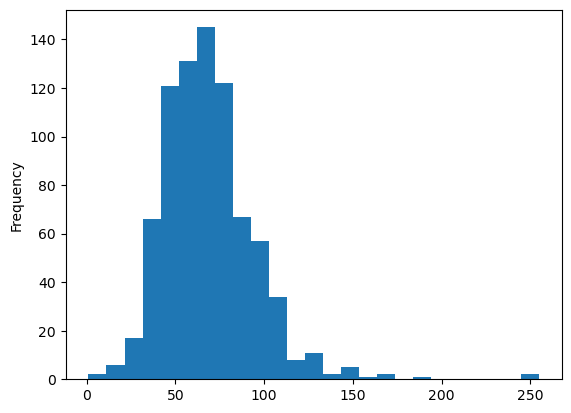

In [53]:
pokemons.HP.plot(kind='hist', bins=25)

Ziet eruit als een Weibull Distribution maar niet heel erg. Voor het mooie te weinig data om een goed figuur te maken.

<AxesSubplot:ylabel='Frequency'>

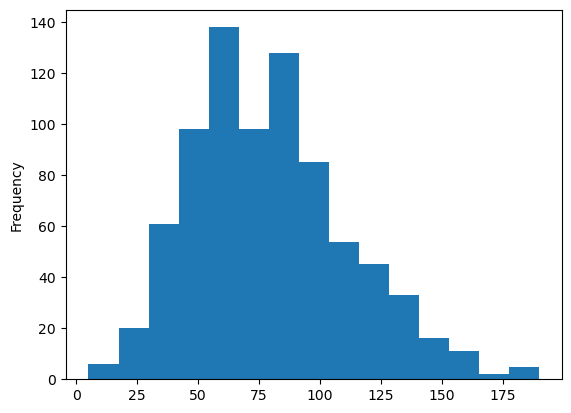

In [54]:
pokemons.Attack.plot(kind='hist', bins=15)

Ziet eruit als een Weibull Distribution maar niet heel erg. Voor het mooie te weinig data om een goed figuur te maken.

### Portfolio assignment 8
15 min: 
- Calculate the 90%, 95%, 99% and 99.99% confidence interval for at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you see the impact the confidence has on the interval?
- Now calculate the 95% confidence interval again but use only the first 10% of your rows. Compare this interval to the previous 95% confidence interval you calculated. Do you see the impact of having less data?

![](https://i.imgur.com/0v1CGNV.png)

In [64]:
import scipy.stats as st
confidence = 0.90
st.t.interval(confidence, len(pokemons.HP)-1, loc=pokemons.HP.mean(), scale=st.sem(pokemons.HP))

(67.77207401303053, 70.74542598696948)

In [65]:
import scipy.stats as st
confidence = 0.90
st.t.interval(confidence, len(pokemons.Attack)-1, loc=pokemons.Attack.mean(), scale=st.sem(pokemons.Attack))

(77.11152171030228, 80.89097828969771)

In [67]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(pokemons.HP)-1, loc=pokemons.HP.mean(), scale=st.sem(pokemons.HP))

(67.48663581109385, 71.03086418890616)

In [68]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(pokemons.Attack)-1, loc=pokemons.Attack.mean(), scale=st.sem(pokemons.Attack))

(76.74869843886454, 81.25380156113546)

In [69]:
import scipy.stats as st
confidence = 0.99
st.t.interval(confidence, len(pokemons.HP)-1, loc=pokemons.HP.mean(), scale=st.sem(pokemons.HP))

(66.92775739359868, 71.58974260640133)

In [70]:
import scipy.stats as st
confidence = 0.99
st.t.interval(confidence, len(pokemons.Attack)-1, loc=pokemons.Attack.mean(), scale=st.sem(pokemons.Attack))

(76.03830265303164, 81.96419734696836)

In [71]:
import scipy.stats as st
confidence = 0.9999
st.t.interval(confidence, len(pokemons.HP)-1, loc=pokemons.HP.mean(), scale=st.sem(pokemons.HP))

(65.72856061315291, 72.7889393868471)

In [72]:
import scipy.stats as st
confidence = 0.9999
st.t.interval(confidence, len(pokemons.Attack)-1, loc=pokemons.Attack.mean(), scale=st.sem(pokemons.Attack))

(74.51399197553003, 83.48850802446997)

Hier zien we dat hoe nauwkeuriger de confidence rate des te groter de range van de getallen wordt. Daarnaast is het gemiddelde van de pokemons HP afgerond 69 dus deze getallen zouden wel kunnen kloppen.

Dit zien we ook terugkomen bij de confidence rate van de attack waarbij ook deze range steeds groeit als de confidence groeit. De gemiddelde attack is 79 dus ook deze data zou correct kunnen zijn.

In [77]:
hpLength = len(pokemons.HP) * 0.1

import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, hpLength, loc=pokemons.HP.mean(), scale=st.sem(pokemons.HP))

(67.46214685033002, 71.05535314967)

In [ ]:
Getal met 10%: 
    (67.46214685033002, 71.05535314967)
Getal met hele dataset:
    (67.48663581109385, 71.03086418890616)

Hier is te zien dat er wel een klein verschil in de data range zit echter is deze minimaal.